# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
count     440    440      440     440               440           440
mean    12000   5796     7951    3072              2881          1525
std     12647   7380     9503    4855              4768          2820
min         3     55        3      25                 3             3
25%      3128   1533     2153     742               257           408
50%      8504   3627     4756    1526               816           966
75%     16934   7190    10656    3554              3922          1820
max    112151  73498    92780   60869             40827         47943

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
10   26.93  64.55    82.05   79.55             84.32         73.18
199  55.80  36.59    24.09   18.64             35.91         21.36
200  24.32  91.82    94.55   77.73             94.09         41.36
210  79.09  30.23    10.68   55.68             23.64         79.55
220  70.45  10.80    10.23   54.77              4.66         42.27


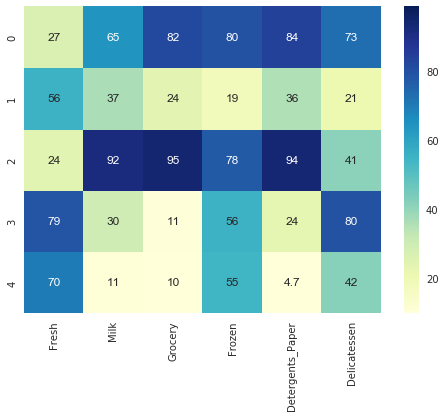

In [59]:
# Display a description of the dataset
display(np.round(data.describe()))
import seaborn as sns

# look at percentile ranks
#pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=4)
pcts = 100. * data.rank(axis=0, pct=True).iloc[[10,199,200,210,220]].round(decimals=4)
print pcts


# visualize percentiles with heatmap
_ = sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=10, vmax=99, cmap='YlGnBu')

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [30,55,198]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
display(samples.describe())
display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  18815  3610    11107    1148              2134          2963
1   5264  3683     5005    1057              2024          1130
2  11686  2154     6824    3527               592           697

Fresh        Milk       Grocery       Frozen  Detergents_Paper  \
count      3.000000     3.00000      3.000000     3.000000          3.000000   
mean   11921.666667  3149.00000   7645.333333  1910.666667       1583.333333   
std     6778.573178   862.46797   3132.816996  1400.525021        860.279799   
min     5264.000000  2154.00000   5005.000000  1057.000000        592.000000   
25%     8475.000000  2882.00000   5914.500000  1102.500000       1308.000000   
50%    11686.000000  3610.00000   6824.000000  1148.000000       2024.000000   
75%    15250.500000  3646.50000   8965.500000  2337.500000       2079.000000   
max    18815.000000  3683.00000  11107.000000  3527.000000       2134.000000   

       Delicatessen  
count      3.000000  
mean    1596.666667  
std     1202.922414  
min      697.000000  
25%      913.500000  
50%     1130.000000  
75%     2046.500000  
max     2963.000000

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   6815 -2186     3156   -1924              -747          1438
1  -6736 -2113    -2946   -2015              -857          -395
2   -314 -3642    -1127     455             -2289          -828

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  10311   -17     6351    -378              1318          1997
1  -3240    56      249    -469              1208           164
2   3182 -1473     2068    2001              -224          -269

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
0 has a lot of fresh foods, 6,815 more than average and 10311 more than the median - might be a juicing store?
1 is below average in each category although it is above the median in milk, grocery and detergents_paper - might be a coffee shop.
2 has lots of fresh, grocery, and frozen - might be a corner market.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
X = pd.DataFrame(data).drop(['Frozen'],axis=1)

y = pd.DataFrame(data).filter(['Frozen'])

#print X.head, y.head

In [5]:
# TODO: Split the data into training and testing sets using the given feature as the target

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# TODO: Create a decision tree regressor and fit it to the training set

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train,y_train)
y_pred = regr_1.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print score , r2

23561383.3958 0.0102714394534


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict the Frozen feature.  My prediction score was R^2 which produced a very low 1.03%. This low score suggests that the other features don't predict Frozen well. As a result, the Frozen feature appears to be uncorrelated with other customer spending habits. 

Since Frozen is uncorrelated with the other features, it has the potential to bring in valuable extra information not reflected by the other features when building a clustering segementation of the customer base.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

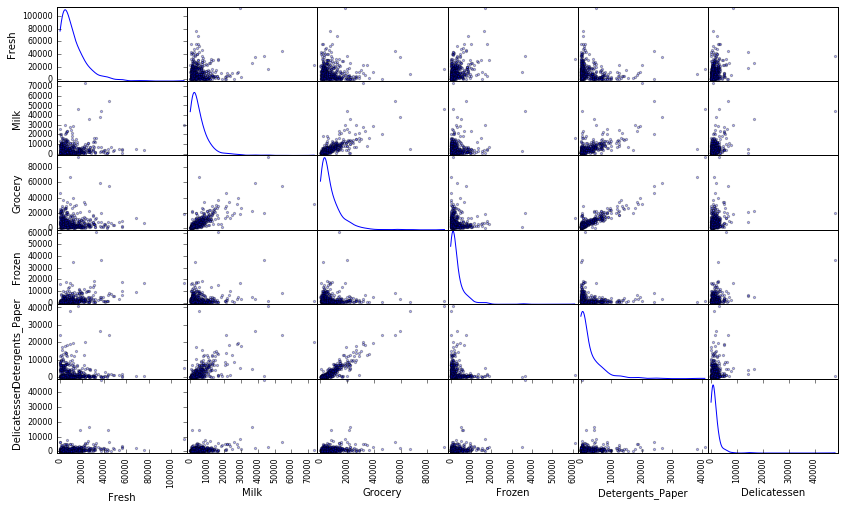

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

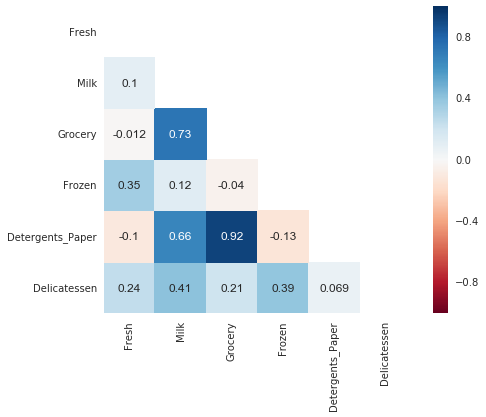

In [7]:
import seaborn as sns
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')

**Answer:**  I see a good corrlation in the scatter plots between Detergents_Paper and Grocery. Milk and Grocery aslo show a good correlation.  The scatter confirms that Frozen is not well correlated with any other category.  The data is not normally distributed.  There is a strong right tail to the distributions and no left tail.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

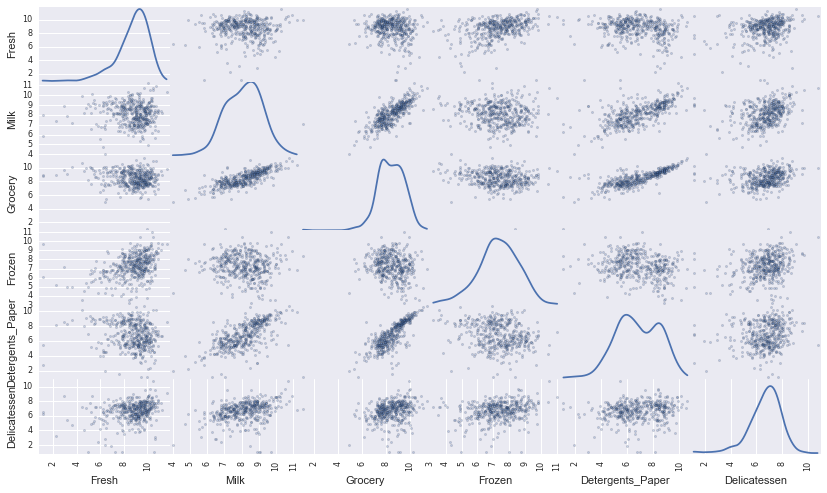

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.842410  8.191463  9.315331  7.045777          7.665753      7.993958
1  8.568646  8.211483  8.518193  6.963190          7.612831      7.029973
2  9.366147  7.675082  8.828201  8.168203          6.383507      6.546785

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values

outliers  = pd.DataFrame([])
idx = []
idx2=[]
mult_outlier = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #display(outlier_rows)
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    print(sorted(idx))

    # OPTIONAL: Select the indices for data points you wish to remove
print "idx=", idx
for i in idx:
    if i not in idx2:
        idx2.append(i)
    else:
        mult_outlier.append(i)
        print "multiple outlier" , i

good_data = log_data.drop(log_data.index[idx2]).reset_index(drop = True)
outliers = idx2


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

[65, 66, 81, 86, 95, 96, 98, 128, 154, 171, 193, 218, 304, 305, 338, 353, 355, 356, 357, 412]
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

[65, 66, 75, 81, 86, 95, 96, 98, 128, 154, 154, 171, 193, 218, 304, 305, 338, 353, 355, 356, 357, 412]
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

[38, 57, 65, 65, 66, 75, 81, 86, 95, 96, 98, 128, 145, 154, 154, 171, 175, 193, 218, 264, 304, 305, 325, 338, 353, 355, 356, 357, 412, 420, 429, 439]
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

[38, 57, 65, 65, 66, 75, 75, 81, 86, 95, 96, 98, 128, 145, 154, 154, 161, 171, 175, 193, 218, 264, 304, 305, 325, 338, 353, 355, 356, 357, 412, 420, 429, 439]
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
idx= [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
multiple outlier 154
multiple outlier 65
multiple outlier 75
multiple outlier 66
multiple outlier 128
multiple outlier 154


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  Yes, for example: row 154 is an outlier for both grocery and milk and row 75 is in both grocery and Detergents_Paper.  If the entire row for all outliers is removed from the dataset when one feature is considered an outlier, then outliers which show up in two or more features are already on the list of outliers for the dataset. I found six such multiple outliers. Hence, for thee six cases, the final list of outliers for any feature may include datapoints that are not extreme for a given feature but are part of a sample that had an extreme datapoint for one of the other features.

I believe removing outliers is important here for several reasons.  First, they can skew the clustering analysis with a disproportionate impact.  Second, outliers often reflect bad data and bad data can give false results.  Finally, we have enough datapoints after removing the outliers to complete the clustering analysis. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

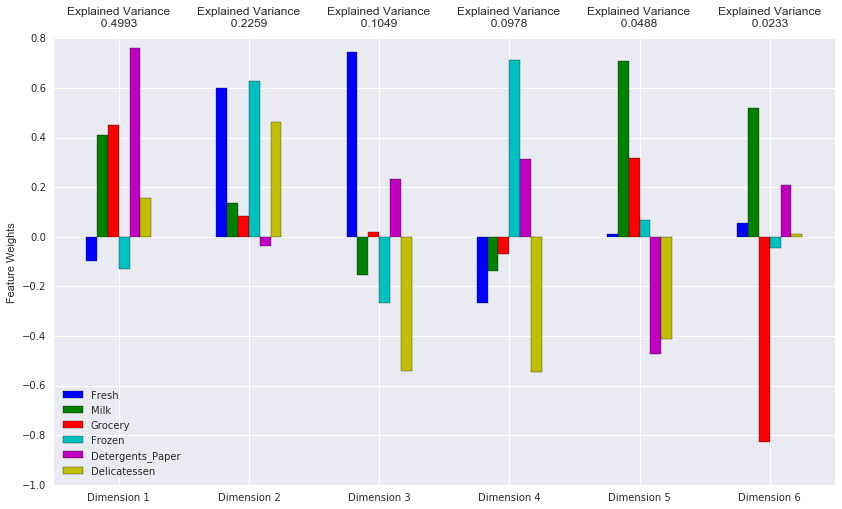

In [11]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(copy=True, n_components=6, whiten=False)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  The first two principal components exlain 72.5% of the total variance.  The first four components explian 92.8% of the variance.  In the first four dimensions, the first two generally have positive weights while the second two are somewhat mixed.  Positive weights indicate more spending in one feature leads to more spending in other features.  

For dimensions 3 and 4 some weights, such as Delcatessen turn from positive to negative.  This indicates while Delicatessen spending not explained by other spending will eventually lead to lower values in dimension 3 and 4, hence lower overall spending as indicated by thoser dimensions.

Detergents_paper had a significant positive weight in the first dimension, not much impact in the second dimention, and then returned with positive weights in the third and forth dimensions.

Dimension 1 is driven mostly by Detergent_Paper, Milk, and Grocery - all in the positive direction.
Dimension 2 is driven mostly by Fresh, Frozen, and Delicatessen - all positive.
Dimension 3 has a positive impace from Fresh and Detergents_Paper and a negative impace from Milks, Frozen, and Delicatessen.
Dimension 4 is pulled up by Frozen and Detergents_Paper and down mostly by Fresh and Delicatessen

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.2491       0.9103       0.3467      -0.9615      -0.5883   
1       0.8402      -0.4169      -0.0896      -0.1186      -0.4245   
2      -0.4824       0.5965       0.2455       0.4550       0.1642   

   Dimension 6  
0      -0.4436  
1       0.1404  
2      -0.6673

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(copy=True, n_components=2, whiten=False)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print good_data.shape, reduced_data.shape, pca_samples.shape

(398, 6) (398, 2) (3, 2)


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 2), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0         1.25         0.91
1         0.84        -0.42
2        -0.48         0.60

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  K-Means is the most popular clustering algorithm and it works well if the clusters are convex.  It is constructed by using a process that minimizes the distance between each datapoint and the center of its cluser.  K-means does not work well for non-convext clusters such as a line or circle.  K means converges and is scaleable for large samples.

Gaussian Mixture Model (GMM) is probabilistic model that computes the probability that a datapoint came from any particular cluster.  It is constructed by starting with random clusters and computing the probability for each sample to each cluster-center.  A function is then set up that computes the sum of the probabilities for all datapoints to thier most highest probability cluster.  The algorithm then iterates on different cluster-centers until it discovers a group of cluster-centers that produce a local maximum for the function.  Once this set of maximum likelyhood cluster-centers is fixed, each sample is assigned to the cluster with the highest probability assigned to it.

GMM has several advantages to K-Means.  One is that you have the option of soft or hard clustering.  Another is that you can capture data for statistical inference and cluster density.

Computing the estimated probabilities in GMM can be computationally expensive.  Another con of GMM is that is may not converge since there are an infinite number of probabilities.  It can get stuck in a bad local optimum.  If that happens, start with a new rendom starting point set.

I will use the GMM methode becuase it may better idendify high density clusters or client segments which are critical to client profitability. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import pairwise_distances


clusterer = mixture.GMM(n_components=6)
clusterer.fit(reduced_data)
print "weights=", np.round(clusterer.weights_, 2)
print "means=", np.round(clusterer.means_, 2)
print "covariance=", np.round(clusterer.covars_, 2)

# TODO: Predict the cluster for each data point
#clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = np.round(clusterer.means_, 2)
print "cluster centers", centers

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.fit_predict(reduced_data)
print sample_preds
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(reduced_data, sample_preds, metric='euclidean')
sample_silhouette_values = silhouette_samples(reduced_data, sample_preds)
#print "sample Silhouette values", sample_silhouette_values, "sample predictions", sample_preds, "final Silhouette score", score



weights= [ 0.15  0.15  0.16  0.09  0.24  0.2 ]
means= [[-1.63 -0.79]
 [ 2.2   0.23]
 [ 0.68  1.77]
 [ 2.44 -1.92]
 [-1.43  0.36]
 [-0.39 -0.59]]
covariance= [[ 2.19  1.6 ]
 [ 0.84  0.29]
 [ 3.46  0.82]
 [ 0.47  0.62]
 [ 0.57  0.81]
 [ 2.97  0.63]]
cluster centers [[-1.63 -0.79]
 [ 2.2   0.23]
 [ 0.68  1.77]
 [ 2.44 -1.92]
 [-1.43  0.36]
 [-0.39 -0.59]]
[1 1 4 2 4 1 0 1 0 1 1 2 1 1 1 0 5 2 4 0 1 2 4 4 4 5 2 0 1 2 1 0 0 4 3 5 4
 1 4 4 4 5 5 5 1 1 4 1 1 2 0 1 5 2 0 1 2 5 5 4 1 1 2 1 4 0 2 4 0 4 1 0 1 2
 0 0 1 2 0 4 4 3 4 3 2 4 4 5 3 2 4 1 1 4 0 2 5 1 5 2 1 4 2 2 2 2 2 2 2 2 2
 3 0 2 4 2 1 2 2 3 0 3 3 2 1 0 0 4 2 2 3 2 0 2 2 2 0 2 0 5 5 2 1 5 5 2 1 1
 4 1 0 3 3 5 5 5 3 4 2 2 2 1 4 5 2 2 1 5 2 3 3 2 4 4 1 2 0 1 1 4 3 5 3 0 0
 1 2 4 2 1 5 1 5 2 3 3 5 2 2 3 0 1 2 3 2 4 0 2 2 0 2 3 3 4 4 2 2 1 1 5 2 3
 0 2 2 4 2 0 4 2 0 0 4 4 0 3 2 0 4 1 2 1 3 3 2 3 2 3 3 4 2 2 1 2 1 4 2 4 0
 2 2 0 2 0 1 2 0 2 1 1 3 1 1 5 5 1 2 0 5 2 2 5 2 0 1 2 0 0 1 0 2 2 0 2 2 3
 2 2 2 1 2 0 2 1 2 2 2 5 1 5 2 5 1 4 0 1 2 1 

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [16]:

for i in range(2,7):
    clusterer = mixture.GMM(n_components=i)
    spreds = clusterer.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, spreds, metric='euclidean')
    print "i=", i, "score=", score

i= 2 score= 0.443601474015
i= 3 score= 0.358151159705
i= 4 score= 0.291646368377
i= 5 score= 0.266456479995
i= 6 score= 0.307122866447


**Answer:**  I tested n_components, which for GMM equates to number of clusters from 2 through six and got the highest silhouette score, .432 with two clusters.

0.443601474015


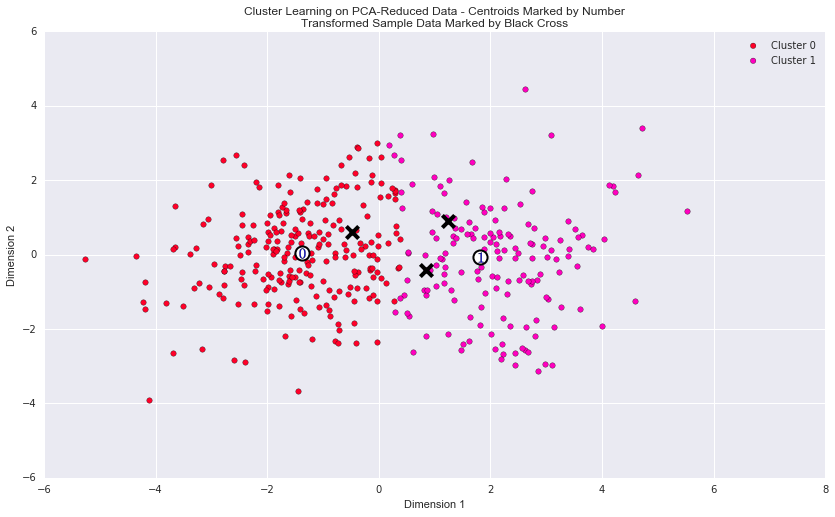

In [17]:
clusterer = mixture.GMM(n_components=2)

spreds = clusterer.fit_predict(reduced_data)
centers = np.round(clusterer.means_, 2)
score = silhouette_score(reduced_data, spreds, metric='euclidean')
print score
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, spreds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(clusterer.means_)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(true_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   8967  1920     2437    2081               309           741
Segment 1   6079  7042    10241    1275              3546          1159

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  We have identified two custumer segments 0 and 1.  Segment 0 purchases much more milk, grocery and detergents_paper and less frozen than customer segment 1.  In fact customer segment 0 is near the 75% band for each of these categories.  Segment 1 is distringuished by very low detergents_paper, its center is near the 25% threshold for the entire customer set.




### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [82]:
display(samples)
display(true_centers)
display(data.sum(axis=1).describe)
sample_preds = clusterer.predict(pca_samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  18815  3610    11107    1148              2134          2963
1   5264  3683     5005    1057              2024          1130
2  11686  2154     6824    3527               592           697

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   8967  1920     2437    2081               309           741
Segment 1   6079  7042    10241    1275              3546          1159

<bound method Series.describe of 0       34112
1       33266
2       36610
3       27381
4       46100
5       26710
6       26465
7       29517
8       18694
9       46662
10      33864
11      21259
12      62889
13      52811
14      53729
15      16961
16      27679
17      20653
18      43180
19      23427
20      32116
21      12775
22      53785
23     110829
24      59390
25      32251
26      17946
27      19227
28      65522
29      50927
        ...  
410     18433
411     14831
412     19232
413     37688
414     18480
415     29545
416     34806
417     26531
418     35425
419     18601
420     31185
421     37193
422     34945
423     29438
424     36432
425     33586
426     46911
427     69812
428     17292
429     16569
430     26706
431     35560
432     29025
433     10039
434     32544
435     73302
436     48372
437     77407
438     17834
439      7589
dtype: int64>

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
Of my three sample data points, the two with heavier spending were predicted to be in cluster 1 while the one with less spending was predicted to be in cluster 0.

Sample 0 was predicted to be in cluster 1.  Relative to the cluster 1 means, it had much more fresh, muc less milk, about the same grocery and frozen, less detergents_paper and more delicatessen.

Sample 1 was predicted to be in cluster 1 as well.  Relative to the cluster 1 means, it had less fresh, much less milk and grocery, similar frozen, less detergents_paper and similar delicatessen.

Sample 2 was predicted to be in cluster 0.  Relative to the cluster 0 means, it had much more fresh, more milk, grocery frozen, and detergents_paper, and less delicatessen.




## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** I would essentially run two intependent  A/Btests for each customer segment.  To do this I would select a group of customers for testing from each of the two customer segmentsthat is large enough for a statistically significant.  I would do this because success in one segment may not lead to success in the other segment.  

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**  The structure of the data clearly indicates that customers can be clustered into one of two groups.  The classification of each customer to one of these two groups can the be used as a feature for further supervised learning tests and predictions.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [20]:
#pca_samples = pd.DataFrame(pca_samples)
print outliers

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 38, 57, 145, 175, 264, 325, 420, 429, 439, 161, 109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343]


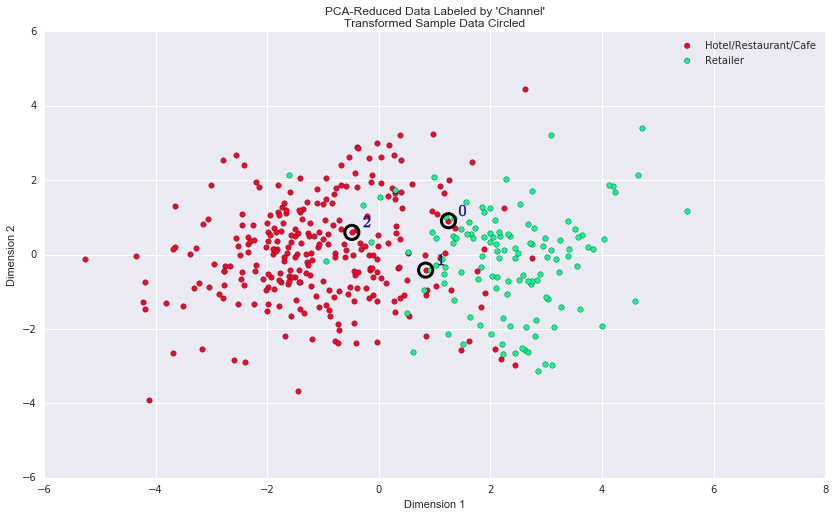

In [21]:
outliers_index = outliers
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers_index, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  The Channel data clearly confirms that cluster analysis with Hotel/Restaurant/Cafe aligning with segment/cluster 1 and Retailers with segment/cluster 0. I would certainly consider Hotel/Restaurant/Cafe and Retailer as consistent with the two segments identified.  The fit is not perfect, per the confusion matrix below the cluster prediction will not match the otel/Restaurant/Cafe vx Retailer classification about 12.3% of the time.

In [79]:
full = pd.read_csv("customers.csv")
channel = pd.DataFrame(full.filter(['Channel'])).drop(log_data.index[idx2]).reset_index(drop = True)
from sklearn.metrics import confusion_matrix

confusion_matrix(channel, spreds)


array([[  0,   0,   0],
       [231,  43,   0],
       [  6, 118,   0]])

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.